In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
path='/content/winequality-red.csv'

data = pd.read_csv(path)
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

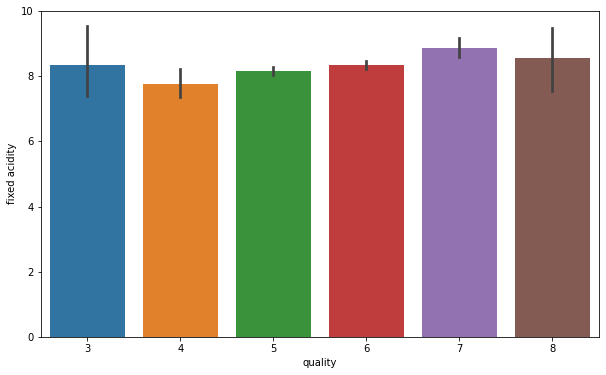

In [ ]:
import seaborn as sns

column='fixed acidity'

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = column , data = data)

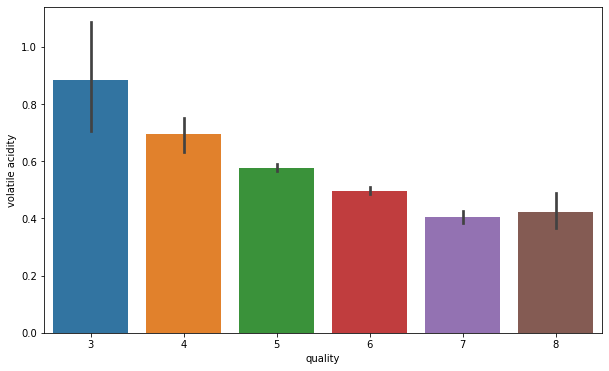

In [ ]:
column='volatile acidity'

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = column , data = data)

citric acid - higher

quality of wine - higher

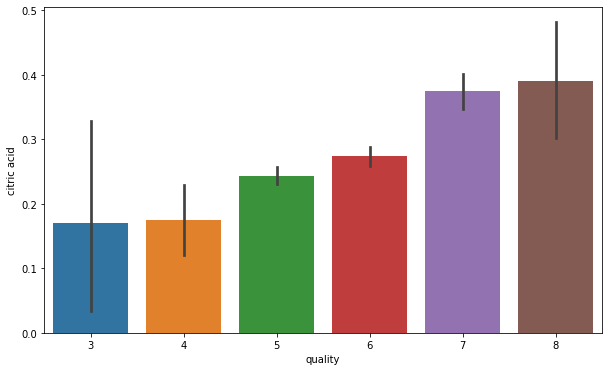

In [ ]:
column='citric acid'

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = column , data = data)

residual sugar-No visible changes with repect to quality of wine.

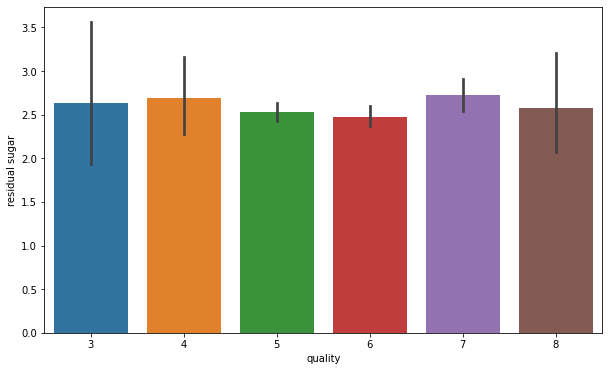

In [ ]:
column='residual sugar'

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = column , data = data)

Chlorides - Lower

Quality of Wine - higher

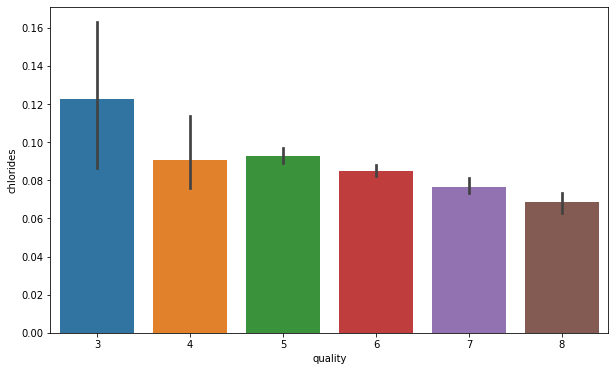

In [ ]:
column='chlorides'

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = column , data = data)

free sulfur dioxide - No derivable traits

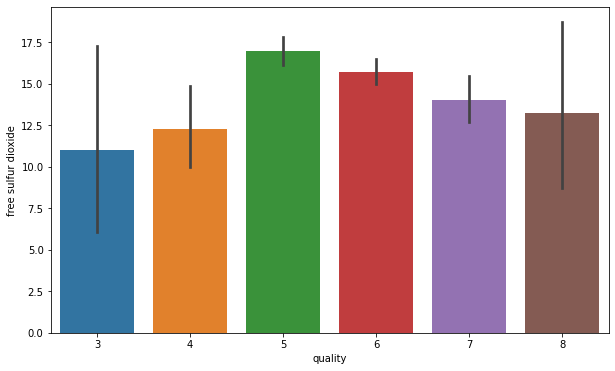

In [ ]:
column='free sulfur dioxide'

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = column , data = data)

total sulfur dioxide - NA

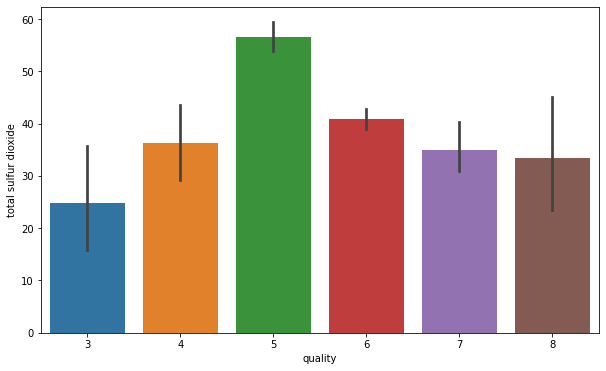

In [ ]:
column='total sulfur dioxide'

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = column , data = data)

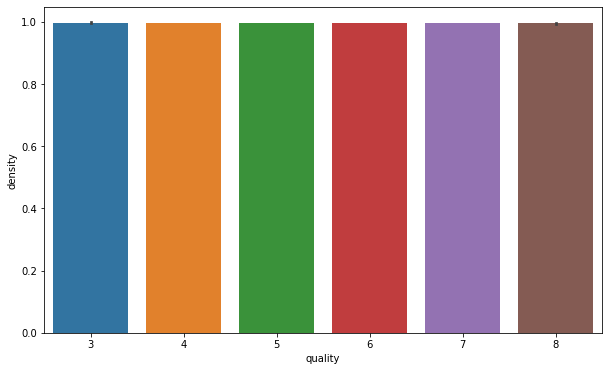

In [ ]:
column='density'

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = column , data = data)

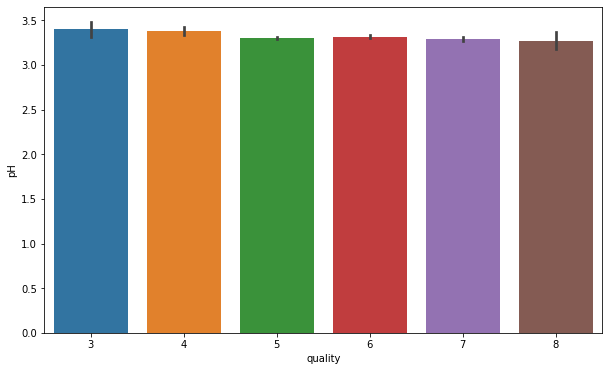

In [ ]:
column='pH'

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = column , data = data)

Sulphates - Higher

Quality of Wine - Higher

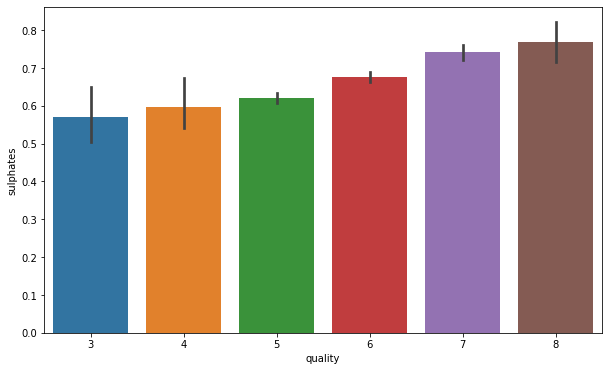

In [ ]:
column='sulphates'

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = column , data = data)

Alcohol - Effects slightly to higher side

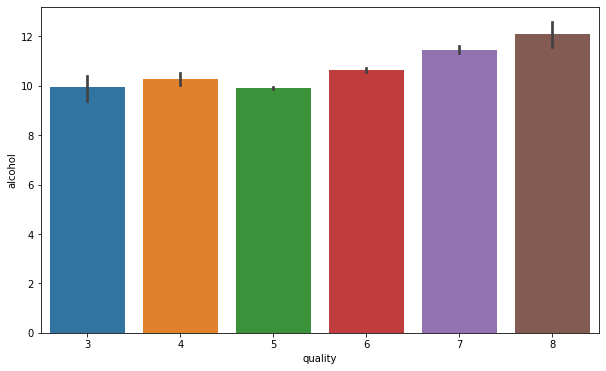

In [ ]:
column='alcohol'

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = column , data = data)

**Finding all correlations btw all the features**

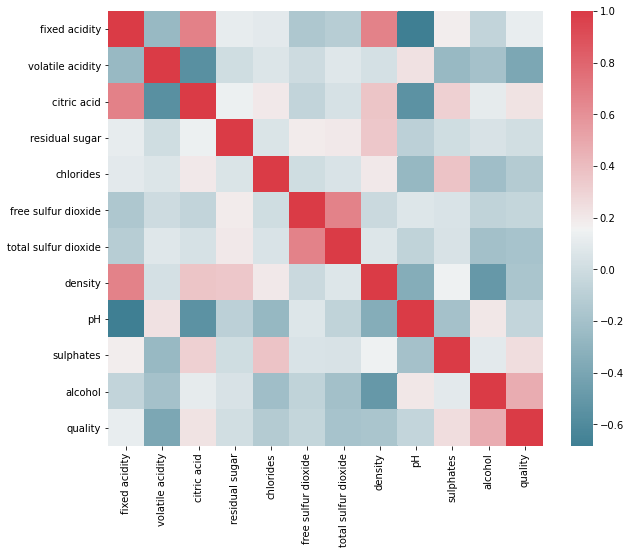

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)


# The strongly correlated feautres are :

1.fixed acidity and citric acid.

2.free sulphur dioxide and total sulphor dioxide.

3.fixed acidity and density.

4.alcohol and quality.



*These are some relations which do not depend on each other at all.*

In [ ]:
sns.pairplot(data)

In [ ]:
data['quality'] = data['quality'].map({3 : 'bad', 4 :'bad', 5: 'bad',6: 'good', 7: 'good', 8: 'good'})
data['quality'].value_counts()


In [ ]:
#using label encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['quality'] = le.fit_transform(data['quality'])

data['quality'].value_counts

In [ ]:
sns.countplot(data['quality'])

In [ ]:
x = data.iloc[:,:11]
y = data.iloc[:,11]
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 44)


In [ ]:
# standard scaling 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV, cross_val_score



# creating the model
model = LogisticRegression()

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))


**Stochastic Gradient Descent Classifier**

In [ ]:
from sklearn.linear_model import SGDClassifier

# creating the model
model = SGDClassifier(penalty=None)

# feeding the training model into the model
model.fit(x_train, y_train)

# predicting the values for the test set
y_pred = model.predict(x_test)

# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.56      0.62       204
           1       0.62      0.76      0.69       196

    accuracy                           0.66       400
   macro avg       0.67      0.66      0.65       400
weighted avg       0.67      0.66      0.65       400



**Support Vector Machine**

In [ ]:
from sklearn.svm import SVC

# creating the model
model = SVC()

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))


In [ ]:
# finding the best parameters for the SVC model

param = {
    'C': [0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(model, param_grid = param, scoring = 'accuracy', cv = 10)


In [ ]:
grid_svc.fit(x_train, y_train)

In [ ]:
grid_svc.best_params_

In [ ]:
# creating a new SVC model with these best parameters

model2 = SVC(C = 1.4, gamma = 0.1, kernel = 'rbf')
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)

print(classification_report(y_test, y_pred))

**Decision Forest**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# creating model
model = DecisionTreeClassifier()

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

In [ ]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))


In [ ]:
#Now lets try to do some evaluation for decision tree model using cross validation.

model_eval = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
model_eval.mean()


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# creating the model
model = RandomForestClassifier(n_estimators = 200)

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

In [ ]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))


In [ ]:
#Now lets try to do some evaluation for random forest model using cross validation.

model_eval = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
model_eval.mean()


**Multi Layer Perceptron**

In [ ]:
from sklearn.neural_network import MLPClassifier

# creating the model
model = MLPClassifier(hidden_layer_sizes = (100, 100), max_iter = 150)

# feeding the training data to the model
model.fit(x_train, y_train)

# calculating the accuracies
print("training accuracy :", model.score(x_train, y_train))
print("testing accuracy :", model.score(x_test, y_test))

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# creating the model
model = Sequential()

# first hidden layer
model.add(Dense(output_dim = 8, init = 'uniform', activation = 'relu', input_dim = 11))

# second hidden layer
model.add(Dense(output_dim = 8, init = 'uniform', activation = 'relu'))

# output layer
model.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the NN
# binary_crossentropy loss function used when a binary output is expected
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) 

model.fit(x_train, y_train, batch_size = 10, nb_epoch = 100)